In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Import Data

In [2]:
Precip = pd.read_excel ('/Users/lakisha/Desktop/Precipitation.xlsx')

In [3]:
Precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State Number  50 non-null     int64  
 1   States        50 non-null     object 
 2   January       50 non-null     float64
 3   February      50 non-null     float64
 4   March         50 non-null     float64
 5   April         50 non-null     float64
 6   May           50 non-null     float64
 7   June          50 non-null     float64
 8   July          50 non-null     float64
 9   Aug           50 non-null     float64
 10  Sep           50 non-null     float64
 11  October       50 non-null     float64
 12  November      50 non-null     float64
 13  December      50 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 5.6+ KB


# Wrangling Data

In [4]:
Precip1 = Precip.drop(['States'], axis=1)
Precip1.head()

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48


In [5]:
Precip1.head(10)

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48
5,6,0.53,0.70,1.37,2.08,2.76,1.84,2.03,1.67,1.26,1.16,0.81,0.59
6,7,3.28,3.13,3.81,3.88,3.79,4.28,4.17,4.21,4.39,4.52,3.51,4.08
7,8,3.51,2.90,4.43,3.55,3.85,4.38,4.60,4.43,4.62,3.99,3.14,4.31
8,9,2.33,2.27,2.47,3.44,4.94,7.76,5.98,7.51,8.45,6.49,3.29,2.25
9,10,4.29,4.61,4.90,3.77,3.12,4.45,4.84,3.96,3.52,3.37,3.91,4.56


In [7]:
x = Precip[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'October', 'November', 'December']]
y = Precip['State Number']

# Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(30, 12) (30,)
(20, 12) (20,)


# Checking Linear Regression

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examine Predictions

In [14]:
predictions = lm.predict(x_test)
predictions

array([31.25894564, 47.71568758, 48.55984354, 46.81360086, 46.86893796,
       28.11243058, 25.48045455, 14.81078479, 10.45153504, 32.33967915,
       29.22436908, 14.65801825,  5.26739874, 34.93273304,  8.01622398,
       25.93609828, 56.07385885,  9.1337473 , 45.77047654, 14.8417489 ])

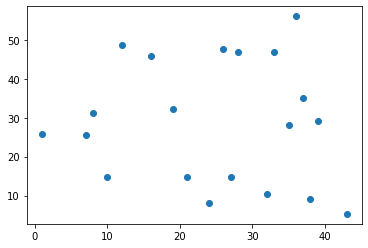

In [15]:
plt.scatter(y_test, predictions)

# Examine Accuracy Score

In [16]:
print("Score:", lm.score(x_test, y_test))

Score: -1.9923786494282867


# MAE

In [17]:
metrics.mean_absolute_error(y_test, predictions)

18.35260455226328

# MSE

In [18]:
metrics.mean_squared_error(y_test, predictions)

433.11688571825016

# Root MSE 

In [19]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

20.811460441743396

# k-Fold Cross Validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create k-Fold

In [21]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 22 23 24 25 26 28
 30 33 34 37 41 43 44 45 47], test: [ 2  3 19 21 27 29 31 32 35 36 38 39 40 42 46 48 49]
train: [ 0  1  2  3  5  6  7  8  9 11 12 15 16 19 20 21 25 27 29 31 32 35 36 37
 38 39 40 42 43 46 47 48 49], test: [ 4 10 13 14 17 18 22 23 24 26 28 30 33 34 41 44 45]
train: [ 2  3  4 10 13 14 17 18 19 21 22 23 24 26 27 28 29 30 31 32 33 34 35 36
 38 39 40 41 42 44 45 46 48 49], test: [ 0  1  5  6  7  8  9 11 12 15 16 20 25 37 43 47]


/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
print(cross_val_score(lm, x,y, cv=2))

[-18.01982201 -12.39956035]


# Looking for k-Mean and Clusters

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

# Perform a k-Mean

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Precip1)

KMeans(n_clusters=3)

In [29]:
Precip1.head()

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48


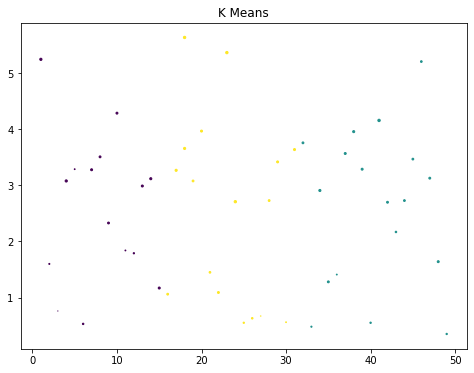

In [34]:
plt.figure(figsize=(8,6))
plt.title('K Means')
plt.scatter(Precip1['State Number'], Precip1['January'], Precip1['April'], c=kmeans.labels_, cmap='viridis')

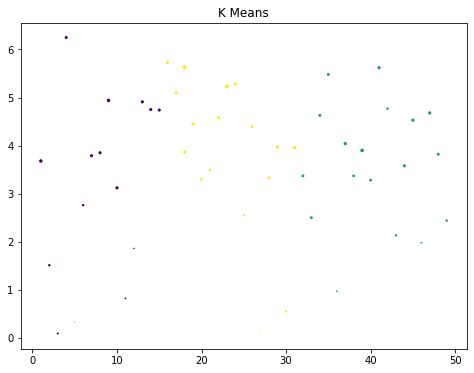

In [35]:
plt.figure(figsize=(8,6))
plt.title('K Means')
plt.scatter(Precip1['State Number'], Precip1['May'], Precip1['July'], c=kmeans.labels_, cmap='viridis')

# Adding Labels to Dataset

In [36]:
Precip1['Group'] = kmeans.labels_

In [37]:
Precip1.head()

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December,Group
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67,0
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82,0
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68,0
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22,0
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48,0


# Investigate KMeans by groupby

In [39]:

Precip1.groupby('Group')['State Number'].mean()

Group
0     8.000000
1    40.500000
2    23.176471
Name: State Number, dtype: float64

In [40]:

Precip1.groupby('Group')['January'].mean()

Group
0    2.588667
1    2.598333
2    2.558824
Name: January, dtype: float64

In [41]:
Precip1.groupby('Group')['April'].mean()

Group
0    2.876000
1    3.206667
2    3.478235
Name: April, dtype: float64

In [42]:
Precip1.groupby('Group')['May'].mean()

Group
0    3.159333
1    3.616111
2    3.851765
Name: May, dtype: float64

In [43]:
Precip1.groupby('Group')['July'].mean()

Group
0    3.278667
1    3.493889
2    4.043529
Name: July, dtype: float64

In [44]:
kmeans.cluster_centers_

array([[ 8.        ,  2.58866667,  2.482     ,  2.902     ,  2.876     ,
         3.15933333,  3.404     ,  3.27866667,  3.218     ,  3.252     ,
         2.97733333,  2.67533333,  2.88066667],
       [40.5       ,  2.59833333,  2.40888889,  3.04222222,  3.20666667,
         3.61611111,  3.74833333,  3.49388889,  3.28888889,  3.13388889,
         3.20444444,  2.73166667,  3.00888889],
       [23.17647059,  2.55882353,  2.36941176,  3.14705882,  3.47823529,
         3.85176471,  4.23941176,  4.04352941,  3.73176471,  3.37882353,
         3.21470588,  2.73588235,  2.84294118]])

# Decision Trees

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
Precip.head()

,State Number,States,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,Alabama,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,Alaska,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,Arizona,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,Arkansas,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,California,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48


# Wrangling Data

In [50]:
Precip2 = Precip.drop(['States'], axis=1)
Precip2.head()

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48


In [51]:
x = Precip2.drop('State Number', axis=1)
y = Precip2['State Number']

# Train Test Split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

# Creating an initial Decision Tree

In [53]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

# Assessing the model

In [54]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,treePredictions))
print(classification_report(y_test,treePredictions))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 

/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/an

# Random Forest

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Wrangle Data

In [56]:
Precip2 = Precip.drop(['States'], axis=1)
Precip2.head()

,State Number,January,February,March,April,May,June,July,Aug,Sep,October,November,December
0,1,5.25,4.87,5.05,4.92,3.68,5.08,5.94,5.22,4.15,3.21,4.63,5.67
1,2,1.60,1.60,1.14,1.10,1.51,1.35,2.02,3.25,4.70,3.62,2.82,2.82
2,3,0.76,1.35,0.75,0.11,0.09,0.10,1.09,0.70,0.52,0.57,0.40,0.68
3,4,3.08,2.87,4.89,4.84,6.25,4.44,4.10,3.91,4.57,4.42,4.49,4.22
4,5,3.29,3.64,2.23,0.69,0.32,0.09,0.02,0.00,0.13,0.58,0.78,2.48


# Train Test Split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

# Initial Random Forest Model

In [58]:
forest = RandomForestClassifier(n_estimators=10, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=76)

# Evaluate Model Fit

In [59]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0

/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakisha/opt/an